In [1]:
# Imports
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [2]:
# Dataset for Classification
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

print("Samples: ", len(x))

Samples:  569


In [3]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
# CrossValidation mit KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

# Params für KNN: n_neighbors, weights, p
parameters = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}
neigh = KNeighborsClassifier()

# GridSearchCV uses a 3-fold cross-validation
clf = GridSearchCV(neigh, parameters, cv=10)
clf.fit(x, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
for key in clf.cv_results_.keys():
    print(key)

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_n_neighbors
param_p
param_weights
params
split0_test_score
split1_test_score
split2_test_score
split3_test_score
split4_test_score
split5_test_score
split6_test_score
split7_test_score
split8_test_score
split9_test_score
mean_test_score
std_test_score
rank_test_score
split0_train_score
split1_train_score
split2_train_score
split3_train_score
split4_train_score
split5_train_score
split6_train_score
split7_train_score
split8_train_score
split9_train_score
mean_train_score
std_train_score


In [44]:
clf.cv_results_['params']

[{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 3, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 3, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 5, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 5, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 7, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 7, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 9, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 9, 'p': 2, 'weights': 'distance'},
 {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'},
 {'n_neighbors': 11, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'},
 {'n_neighbors': 11

In [45]:
print("Best parameters set found on development set:")
print(clf.best_params_, "\n")

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on development set:
{'n_neighbors': 11, 'p': 1, 'weights': 'distance'} 

0.937 (+/-0.047) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.935 (+/-0.049) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.926 (+/-0.059) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.930 (+/-0.055) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.933 (+/-0.046) for {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.931 (+/-0.045) for {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.930 (+/-0.058) for {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.930 (+/-0.051) for {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.933 (+/-0.079) for {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.930 (+/-0.072) for {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.928 (+/-0.057) for {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
0.926 (+/-0.053) for {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
0.937 (+/-0.088) for {'n_neighbors': 9, 'p': 1, 'weight

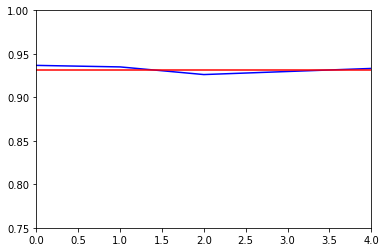

In [46]:
plt.plot(range(len(clf.cv_results_['mean_test_score'])), clf.cv_results_['mean_test_score'], color="blue")
plt.xlim(0, 4)
plt.ylim(0.75, 1)
plt.axhline(np.mean(clf.cv_results_['mean_test_score']), linestyle='-', color="red")
plt.show()